In [4]:
import numpy as np
import math

In [5]:
def custom_axis_rotation(angle, axis_vector):
    """
    Takes in an angle in degrees and a custom axis vector to rotate around and returns rotation matrix.

        Parameters:
                angle (float): Angle of rotation
                axis_vector (np.array): Custom Axis of rotation vector array ([0, 0, 0]) 

        Returns:
                Rotation matrix of angle about custom axis vector of rotation entered
    """

      #convert angle from degrees to radians
    angle_rad = math.radians(angle)
    
    #Define s as sin(angle in radians)
    s = np.sin(angle_rad)
    #Define c as sin(angle in radians)
    c = np.cos(angle_rad)

    #Normalizes the axis vector
    axis_vector_norm = axis_vector / np.linalg.norm(axis_vector)

    v = 1 - c
   
   #Define x, y, z of normalized vector
    x = axis_vector_norm[0]
    y = axis_vector_norm[1]
    z = axis_vector_norm[2]
  
    #Break down of custom axis rotation matrix calculations
    aa = x*x*v+c
    ab = x*y*v-z*s
    ac = x*z*v+y*s
    
    ba = x*y*v+z*s
    bb = y*y*v+c
    bc = y*z*v-x*s

    ca = x*z*v-y*s
    cb = y*z*v+x*s
    cc = z*z*v+c

    custom_axis_rotation_matrix = np.array([(aa, ab, ac),
                                            (ba, bb, bc),
                                            (ca, cb, cc)], dtype=float)

    return custom_axis_rotation_matrix

In [6]:

def rodrigues_rot(v, k, theta):
    print(v)
    [m,n] = v.shape
    #print(m)
    print(n)
    if ((m!=3) and (n!=3)):
        print("Error: Input vector is not three dimensional")
    elif ((v.size) != (k.size)):
        #print(v.shape)
        #print(k.shape)
        print("Error: Rotation vector v and axis k have different dimensions")                                                                                      
    
    k = k/math.sqrt(k[0]**2 + k[1]**2 + k[2]**2) #Normalize roation axis
    print(k)
    No = v.size / 3 #number of vectors in array
    v_rot = v #initialize rotated vector array
    if (n == 3):
        crosskv = v[0,] #initialize cross product k and v with right dim
        print(crosskv)
        for i in range (int(No)):
            crosskv[0] = k[1] * v[i,2] - k[2] * v[i,1] 
            crosskv[1] = k[2] * v[i,0] - k[0] * v[i,2] 
            crosskv[2] = k[0] * v[i,1] - k[1] * v[i,0]
            v_rot[i,] = np.cos(theta) * v[i,] + (crosskv) * np.sin(theta) + k * (np.dot(k,(v[i,]))) * (1 - np.cos(theta))
    
    else: #If m == 3 and n != 3
        crosskv = v[:,0] #Initalize cross product k and v with right dim
        for i in range (int(No)):
            crosskv[0] = k[1] * v[2,i] - k[2] * v[1,i] 
            crosskv[1] = k[2] * v[0,i] - k[0] * v[2,i] 
            crosskv[2] = k[0] * v[1,i] - k[1] * v[0,i]
            v_rot[:,i] = np.cos(theta) * v[:,i] + (crosskv) * np.sin(theta) + k * (np.dot(k,(v[:,i]))) * (1 - np.cos(theta)) 
    return v_rot   


In [7]:
v = np.array([np.array([0.2,0,0.83]),np.array([0.2,0,0.83]), np.array([0.0,0.05,0]), np.array([0.5,0.25,0.1]), np.array([0.2,0.5,0.40]), np.array([0.65,0.55,0.2])])
k = np.array([0,1,0])
thetaPitch = 1.0472

In [8]:
rodrigues_rot(v,k,thetaPitch)


custom_axis_rotation

[[0.2  0.   0.83]
 [0.2  0.   0.83]
 [0.   0.05 0.  ]
 [0.5  0.25 0.1 ]
 [0.2  0.5  0.4 ]
 [0.65 0.55 0.2 ]]
3
Error: Rotation vector v and axis k have different dimensions
[0. 1. 0.]
[0.2  0.   0.83]


array([[ 0.2       ,  0.        , -0.65      ],
       [ 0.81880168,  0.        ,  0.24179291],
       [ 0.        ,  0.05      ,  0.        ],
       [ 0.3366016 ,  0.25      , -0.38301353],
       [ 0.44641023,  0.5       ,  0.02679383],
       [ 0.49820395,  0.55      , -0.46291773]])

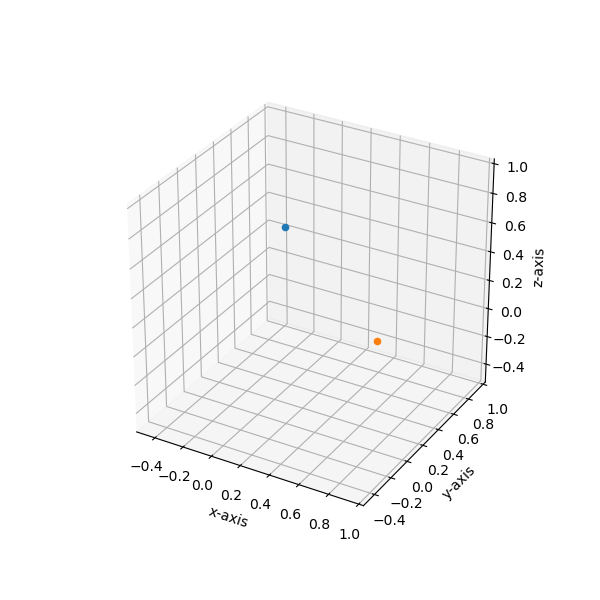

Unhandled message type dblclick. {'x': 305, 'y': 324, 'button': 0, 'guiEvent': {'isTrusted': True}, 'type': 'dblclick'}
Unhandled message type dblclick. {'x': 283, 'y': 331, 'button': 0, 'guiEvent': {'isTrusted': True}, 'type': 'dblclick'}
Unhandled message type dblclick. {'x': 283, 'y': 331, 'button': 0, 'guiEvent': {'isTrusted': True}, 'type': 'dblclick'}
Unhandled message type dblclick. {'x': 1208, 'y': 356, 'button': 0, 'guiEvent': {'isTrusted': True}, 'type': 'dblclick'}
Unhandled message type dblclick. {'x': 1160, 'y': 333, 'button': 0, 'guiEvent': {'isTrusted': True}, 'type': 'dblclick'}
Unhandled message type dblclick. {'x': 885, 'y': 195, 'button': 0, 'guiEvent': {'isTrusted': True}, 'type': 'dblclick'}


In [27]:
#Testing 3D Plots

%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(0.2,0,0.83) # plot the point (2,3,4) on the figure
ax.scatter3D(0.81880168, 0, 0.24179291)
X, Y, Z, U, V, W = [0, 1, 0, 0, 0, 0]
ax.set_xlim([-0.5, 1])
ax.set_ylim([-0.5, 1])
ax.set_zlim([-0.5, 1])

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

plt.show()
